In [1]:
import pandas as pd
df = pd.read_csv('car_insurance.csv')
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0


## Dataset
Historical Data on auto claims.The objective is to predict if someone will be filing for an insurance claim in the next 6 months?

In [2]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.25)

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
data_sub = train[['policy_tenure','age_of_car','age_of_policyholder','is_claim']]
model = smf.glm("is_claim~policy_tenure+age_of_car",data=data_sub,family=sm.families.Binomial()).fit()

In [5]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_claim   No. Observations:                43944
Model:                            GLM   Df Residuals:                    43941
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10219.
Date:                Mon, 09 Jan 2023   Deviance:                       20439.
Time:                        11:03:11   Pearson chi2:                 4.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.007422
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.0361      0.044    -69.276

### Making predictions and computing ROC, AUC and Confusion Matrix

In [6]:
model.predict(test)

14544    0.046032
41085    0.043214
39981    0.035844
11505    0.041722
39175    0.057672
           ...   
34759    0.067285
39705    0.044308
22264    0.055018
38075    0.047206
1794     0.061375
Length: 14648, dtype: float64

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [8]:
y_true = test['is_claim']
y_true.mean()

0.06560622610595303

In [9]:
y_score = model.predict(test)
y_pred = y_score.map(lambda x: 1 if x>0.067 else  0)

In [10]:
confusion_matrix(y_true,y_pred)

array([[8076, 5611],
       [ 409,  552]])

In [11]:
roc_auc_score(y_true,y_score) ## marginally better than a coin toss

0.6172921174280919

In [12]:
fpr,tpr,thresh = roc_curve(y_true,y_score)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

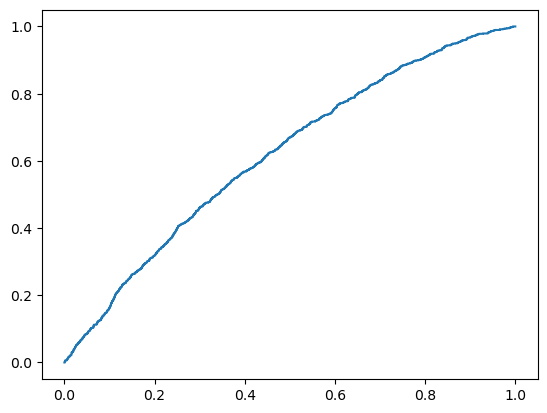

In [14]:
plt.plot(fpr,tpr,"-")

### Class Excercise: Students should create a model with 5 predictors of their choice and then compare the model performance with the previous model